<a href="https://colab.research.google.com/github/Shivam4681/DeepLearning/blob/main/Restaurant_Review_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sentiment Analysis with Keras**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

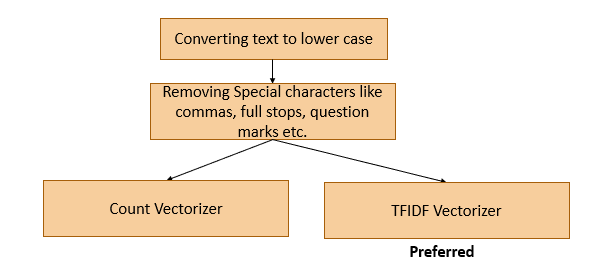


Step 1: Read the dataset

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Shivam4681/Sentiment-Analysis-with-Keras-ANN/main/Restaurant_Reviews.tsv'
df = pd.read_csv(url, sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
s = "Welcome, To Deep Learning Class!"

In [4]:
s.lower()

'welcome, to deep learning class!'

Re use for replace

In [5]:
import re
s1 = re.sub("[^a-z ]", "", s)
s1

'elcome o eep earning lass'

**Create a function to preprocess text**



In [6]:
def preprocessing_text(s):
  s = s.lower()
  s = re.sub('[^a-z ]', '', s)
  return s

In [7]:
a = 'Wow...., The Experience Was Good'
preprocessing_text(a)

'wow the experience was good'

**Apply preprocessing on dataframe**

In [8]:
df['Review_pre'] = df['Review'].apply(preprocessing_text)
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


**Apply TFIDF Vectorizer**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(df['Review_pre']).toarray()

In [10]:
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_pre.shape

(1000, 2046)

In [12]:
y = df['Liked']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64


**Apply Train test split**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, y, test_size=0.2, random_state=21)

In [14]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27867055, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
y_train

108    1
134    1
585    1
42     0
990    0
      ..
48     1
772    0
824    0
207    0
969    0
Name: Liked, Length: 800, dtype: int64

In [16]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y_test

492    0
383    0
856    1
834    1
603    1
      ..
72     0
400    0
813    0
195    1
45     1
Name: Liked, Length: 200, dtype: int64

In [18]:
x_train.shape

(800, 2046)

In [19]:
x_test.shape

(200, 2046)

**Build The Neural Network**

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Dense
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential()

# Input Layer
model.add(Input(shape=(x_train.shape[1],)))

# Hidden Layer 1
model.add(Dense(256, activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.5))

# Hidden layer 2
model.add(Dense(128, activation='relu'))
#Dropout Layer 2
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
es = EarlyStopping(patience=10)

In [25]:
hist = model.fit(x_train, y_train, validation_split=0.2, batch_size=16, epochs=100, callbacks=[es])

Epoch 1/100
40/40 [==============================] - 2s 14ms/step - loss: 0.6891 - accuracy: 0.5531 - val_loss: 0.6889 - val_accuracy: 0.4437
Epoch 2/100
40/40 [==============================] - 0s 11ms/step - loss: 0.6533 - accuracy: 0.7031 - val_loss: 0.6440 - val_accuracy: 0.6812
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.5014 - accuracy: 0.8625 - val_loss: 0.5112 - val_accuracy: 0.7563
Epoch 4/100
40/40 [==============================] - 0s 11ms/step - loss: 0.2227 - accuracy: 0.9563 - val_loss: 0.4593 - val_accuracy: 0.7750
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0912 - accuracy: 0.9766 - val_loss: 0.4659 - val_accuracy: 0.7688
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9953 - val_loss: 0.5214 - val_accuracy: 0.7688
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.5308 - val_accuracy: 0.7812
Epoch 8/1

**Learning curve**

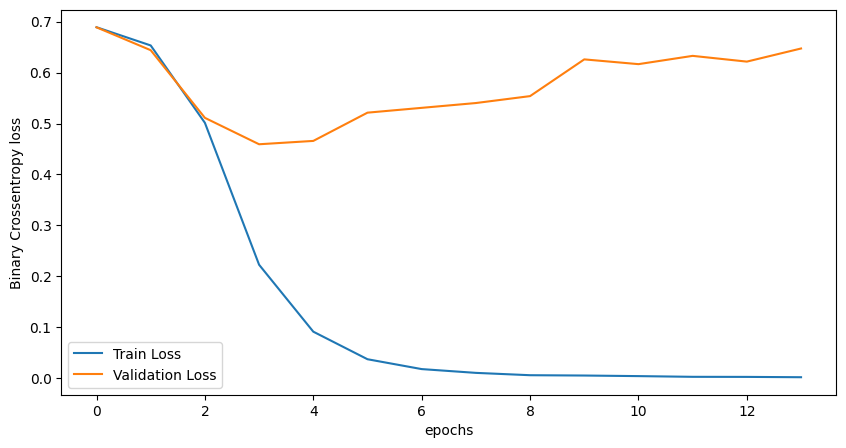

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy loss')
plt.legend()
plt.show()

**Evaluate the model**

In [27]:
model.evaluate(x_train, y_train)

25/25 [==============================] - 1s 9ms/step - loss: 0.1299 - accuracy: 0.9550


[0.1299380511045456, 0.9549999833106995]

In [28]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.5388 - accuracy: 0.7950


[0.5387796759605408, 0.7950000166893005]

**Predict results for train and test**

In [29]:
yprob_train = model.predict(x_train)
yprob_test = model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [30]:
yprob_train[0:5]

array([[9.9851167e-01],
       [9.9997413e-01],
       [9.9999958e-01],
       [3.9211674e-05],
       [9.2949747e-05]], dtype=float32)

In [31]:
ypred_train = [1 if prob>0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>0.5 else 0 for prob in yprob_test]

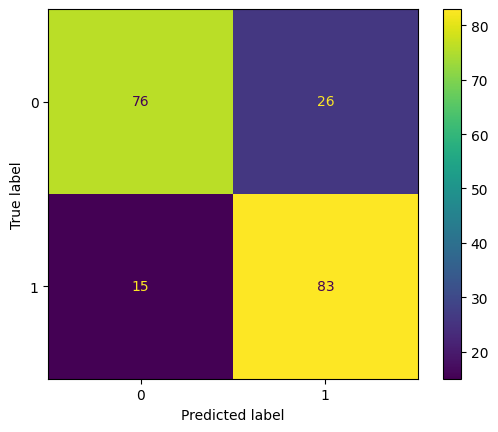

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.76      0.85      0.80        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



Model Accuray is 80 percent so we can use this model for future prediction.

**Save the model for future use**

In [34]:
model.save('SentmentModel.keras')

.

**Load the model**

In [35]:
from keras.models import load_model

In [36]:
mn = load_model('/content/SentmentModel.keras')
mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524032    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557057 (2.13 MB)
Trainable params: 557057 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Out of sample prediction**

In [37]:
s = "Very tasty food"
t = tfidf.transform([s]).toarray()
t

array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
model.predict(t)

1/1 [==============================] - 0s 15ms/step


array([[0.9940871]], dtype=float32)

In [41]:
def predict_sentiment():
  text = input("Please enter restuaraunt review : ")
  text = preprocessing_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print("Positive Review")
  else:
    print("Negative Review")
  return prob

In [42]:
predict_sentiment()

Please enter restuaraunt review : Very good ambience , i liked it
1/1 [==============================] - 0s 15ms/step
Positive Review


array([[0.9996637]], dtype=float32)

In [43]:
predict_sentiment()

Please enter restuaraunt review : Bad Taste, I did not like the taste of Pizza here
1/1 [==============================] - 0s 14ms/step
Negative Review


array([[0.00028318]], dtype=float32)